In [11]:
import numpy as np
import pandas as pd

from analaiser import SymbolAnalyzer

# Load data

In [12]:
# %run get_data.ipynb

In [13]:
tickers = pd.read_csv('data/data.csv')
capital = pd.read_csv('data/top_cap.csv')

In [14]:
tickers = tickers.dropna()
tickers

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,symbol
0,2024-09-05,57970.900,58327.070,55643.650,56180.000,2.780691e+04,1725580799999,1.577771e+09,3368058,1.295589e+04,7.349969e+08,0,BTCUSDT
1,2024-09-06,56180.000,57008.000,52550.000,53962.970,5.444777e+04,1725667199999,2.988915e+09,5287281,2.532519e+04,1.390546e+09,0,BTCUSDT
2,2024-09-07,53962.970,54850.000,53745.540,54160.860,1.669405e+04,1725753599999,9.056933e+08,1920923,8.023907e+03,4.353814e+08,0,BTCUSDT
3,2024-09-08,54160.860,55318.000,53629.010,54869.950,1.627415e+04,1725839999999,8.857432e+08,1796092,8.031761e+03,4.372219e+08,0,BTCUSDT
4,2024-09-09,54869.950,58088.000,54591.960,57042.000,3.238452e+04,1725926399999,1.809715e+09,3355912,1.641283e+04,9.176695e+08,0,BTCUSDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19950,2025-12-10,0.964,0.986,0.944,0.951,7.155704e+07,1765411199999,6.882660e+07,158772,3.690079e+07,3.550013e+07,0,ASTERUSDT
19951,2025-12-11,0.952,0.955,0.914,0.939,4.780367e+07,1765497599999,4.450470e+07,99511,2.364019e+07,2.201985e+07,0,ASTERUSDT
19952,2025-12-12,0.939,0.967,0.925,0.950,4.006273e+07,1765583999999,3.796867e+07,96156,1.961515e+07,1.860140e+07,0,ASTERUSDT
19953,2025-12-13,0.950,0.977,0.943,0.955,2.675862e+07,1765670399999,2.563289e+07,58390,1.355990e+07,1.299639e+07,0,ASTERUSDT


In [15]:
capital

,symbol,name,cap
0,BTCUSDT,Bitcoin,1771860657707
1,ETHUSDT,Ethereum,371992092380
2,USDTUSDT,Tether,186287846849
3,BNBUSDT,BNB,121519190299
4,XRPUSDT,XRP,120045770385
...,...,...,...
95,LSETHUSDT,Liquid Staked ETH,1025724336
96,FBTCUSDT,Function FBTC,1022294658
97,ATOMUSDT,Cosmos Hub,1020046825
98,LBTCUSDT,Lombard Staked BTC,986695433


In [16]:
anal = SymbolAnalyzer(tickers, capital)

In [17]:
# df = anal.run(symbol_list=[
#     'AVAXUSDT',
#     'PAXGUSDT',
#     'ATOMUSDT', 
#     'RENDERUSDT',
#     'VETUSDT', 
#     'DOTUSDT', 
#     'NEARUSDT', 
#     'TONUSDT',
#     'NEXOUSDT'
#     ], optimisation=False)

# df = anal.run(optimisation=False)

df = anal.run()

Analyzing: 100%|██████████| 11/11 [00:00<00:00, 60.89it/s]


In [18]:
df

,date,symbol,last_price,direction,signal_text,cap,SL,TP,adx,plus_di,...,max_historical,mean_100,mean_30,votes_up,votes_down,total_votes,patterns,kadane_coef,kadane_start,kadane_end
6,2025-12-14,QNTUSDT,78.000000,⬆️22 (U:33.9 D:11.9 N:5.3),HOLD,1.138706,58.702859,93.600000,20.941942,17.214470,...,134.970000,89.931000,85.571000,33.947012,11.910313,22,"{'hammer_up': [('2025-09-11', 98.52), ('2025-0...",0.0,2025-07-20,2025-07-28
3,2025-12-14,LTCUSDT,78.860000,⬆️15 (U:29.2 D:9.5 N:5.6),HOLD,6.054499,61.523511,94.632000,17.392554,15.155458,...,130.910000,99.218400,85.946667,29.246808,9.547243,15,"{'hammer_up': [('2025-09-06', 111.23), ('2025-...",0.0,2025-07-15,2025-08-24
4,2025-12-14,PAXGUSDT,4321.990000,⬆️11 (U:37.0 D:17.3 N:17.8),HOLD,1.473996,4134.887002,5186.388000,25.851487,34.160540,...,4436.750000,3998.279600,4170.929667,36.973576,17.310873,11,"{'hammer_up': [('2025-09-09', 3632.55), ('2025...",0.0,2025-09-29,2025-10-26
9,2025-12-14,TONUSDT,1.574000,⬆️10 (U:30.6 D:10.0 N:8.8),HOLD,3.857256,1.234997,1.888800,36.424879,12.920268,...,3.564000,2.272530,1.630067,30.558636,9.970398,10,"{'hammer_up': [('2025-09-08', 3.077), ('2025-0...",0.0,2025-07-26,2025-08-04
1,2025-12-14,AVAXUSDT,12.940000,⬆️9 (U:25.2 D:12.9 N:5.7),HOLD,5.561586,9.396941,15.528000,32.314805,17.395935,...,35.190000,21.385800,14.051333,25.205633,12.878851,9,"{'hammer_up': [('2025-09-06', 24.09), ('2025-0...",0.0,2025-07-10,2025-10-09
8,2025-12-14,SOLUSDT,129.920000,⬆️7 (U:14.7 D:1.6 N:6.4),HOLD,72.971335,99.862850,155.904000,26.464756,16.401327,...,247.500000,182.125900,135.630000,14.652460,1.615616,7,"{'hammer_up': [('2025-09-13', 235.73), ('2025-...",0.0,2025-07-16,2025-10-09
0,2025-12-14,ARBUSDT,0.204700,➡️0 (U:28.3 D:19.3 N:6.6),HOLD,1.151560,0.140333,0.245640,33.508231,13.867179,...,0.613100,0.335172,0.216173,28.290806,19.280546,0,"{'hammer_up': [('2025-09-09', 0.5039), ('2025-...",0.0,2025-07-09,2025-09-20
2,2025-12-14,LINKUSDT,13.360000,➡️-3 (U:18.8 D:13.8 N:8.5),HOLD,9.329727,10.074557,16.032000,21.647296,16.673503,...,26.790000,17.924300,13.443333,18.832813,13.836744,-3,"{'hammer_up': [('2025-09-06', 21.87), ('2025-0...",0.0,2025-07-10,2025-09-24
7,2025-12-14,SHIBUSDT,0.000008,➡️-6 (U:15.5 D:10.9 N:6.7),HOLD,4.747004,0.000006,0.000010,15.728957,18.482294,...,0.000016,0.000010,0.000008,15.513298,10.938390,-6,"{'hammer_up': [('2025-09-09', 1.266e-05), ('20...",0.0,2025-07-10,2025-07-27
5,2025-12-14,PEPEUSDT,0.000004,➡️-14 (U:21.5 D:17.9 N:10.5),HOLD,1.758832,0.000003,0.000005,29.575542,14.616215,...,0.000014,0.000007,0.000005,21.505202,17.861035,-14,"{'hammer_up': [('2025-09-09', 1.014e-05), ('20...",0.0,2025-07-09,2025-07-27


In [19]:
df['signal_text'].value_counts()

signal_text
HOLD    10
Name: count, dtype: int64

# Технічні індикатори

## 1. ATR (Average True Range)
- **Що це:** Показує волатильність інструменту.
- **Для чого:** Використовується для оцінки ризику, постановки стоп-лоссів.
- **Граничні значення:** не має стандартних "overbought/oversold", високі значення → висока волатильність, низькі → спокійний ринок.

## 2. RSI (Relative Strength Index)
- **Що це:** Індикатор сили тренду.
- **Для чого:** Визначає перекупленість/перепроданість.
- **Граничні значення:**
  - `>70` → перекупленість
  - `<30` → перепроданість
  - `50` → нейтральна зона

## 3. ADX (Average Directional Index)
- **Що це:** Сила тренду без напрямку.
- **Для чого:** Визначає силу тренду, допомагає вирішити, чи торгувати трендово чи боком.
- **Граничні значення:**
  - `>25` → сильний тренд
  - `<20` → слабкий або боковий ринок

## 4. TAIL α (Tail Risk / Steepness α)
- **Що це:** Показник «степеневого хвоста» для негативних доходностей ринку. Відображає, наскільки ринок ще здатний до сильних падінь — фактично оцінює «залишкову енергію хвоста».
- **Для чого:** Використовується для оцінки ризику великих обвалів та ліквідованих позицій; допомагає зрозуміти, чи ринок тимчасово спокійний після серії падінь.
- **Граничні значення:**
  - Низьке α (`<2.0`) → важкий хвіст, висока ймовірність великих падінь (ще є багато «слабких» позицій).
  - Середнє α (`2.0–2.5`) → класичний режим, ринок відносно збалансований.
  - Високе α (`>2.5`) → легкий хвіст, ринок спокійний, бо серйозні падіння вже відбулися і потенційні ліквідації менші.

21:04:18 - cmdstanpy - INFO - Chain [1] start processing
21:04:18 - cmdstanpy - INFO - Chain [1] done processing
21:04:18 - cmdstanpy - INFO - Chain [1] start processing
21:04:18 - cmdstanpy - INFO - Chain [1] done processing
21:04:18 - cmdstanpy - INFO - Chain [1] start processing
21:04:18 - cmdstanpy - INFO - Chain [1] done processing
21:04:18 - cmdstanpy - INFO - Chain [1] start processing
21:04:18 - cmdstanpy - INFO - Chain [1] done processing
21:04:18 - cmdstanpy - INFO - Chain [1] start processing
21:04:18 - cmdstanpy - INFO - Chain [1] done processing
21:04:19 - cmdstanpy - INFO - Chain [1] start processing
21:04:19 - cmdstanpy - INFO - Chain [1] done processing
21:04:19 - cmdstanpy - INFO - Chain [1] start processing
21:04:19 - cmdstanpy - INFO - Chain [1] done processing
21:04:19 - cmdstanpy - INFO - Chain [1] start processing
21:04:19 - cmdstanpy - INFO - Chain [1] done processing
21:04:19 - cmdstanpy - INFO - Chain [1] start processing
21:04:19 - cmdstanpy - INFO - Chain [1]

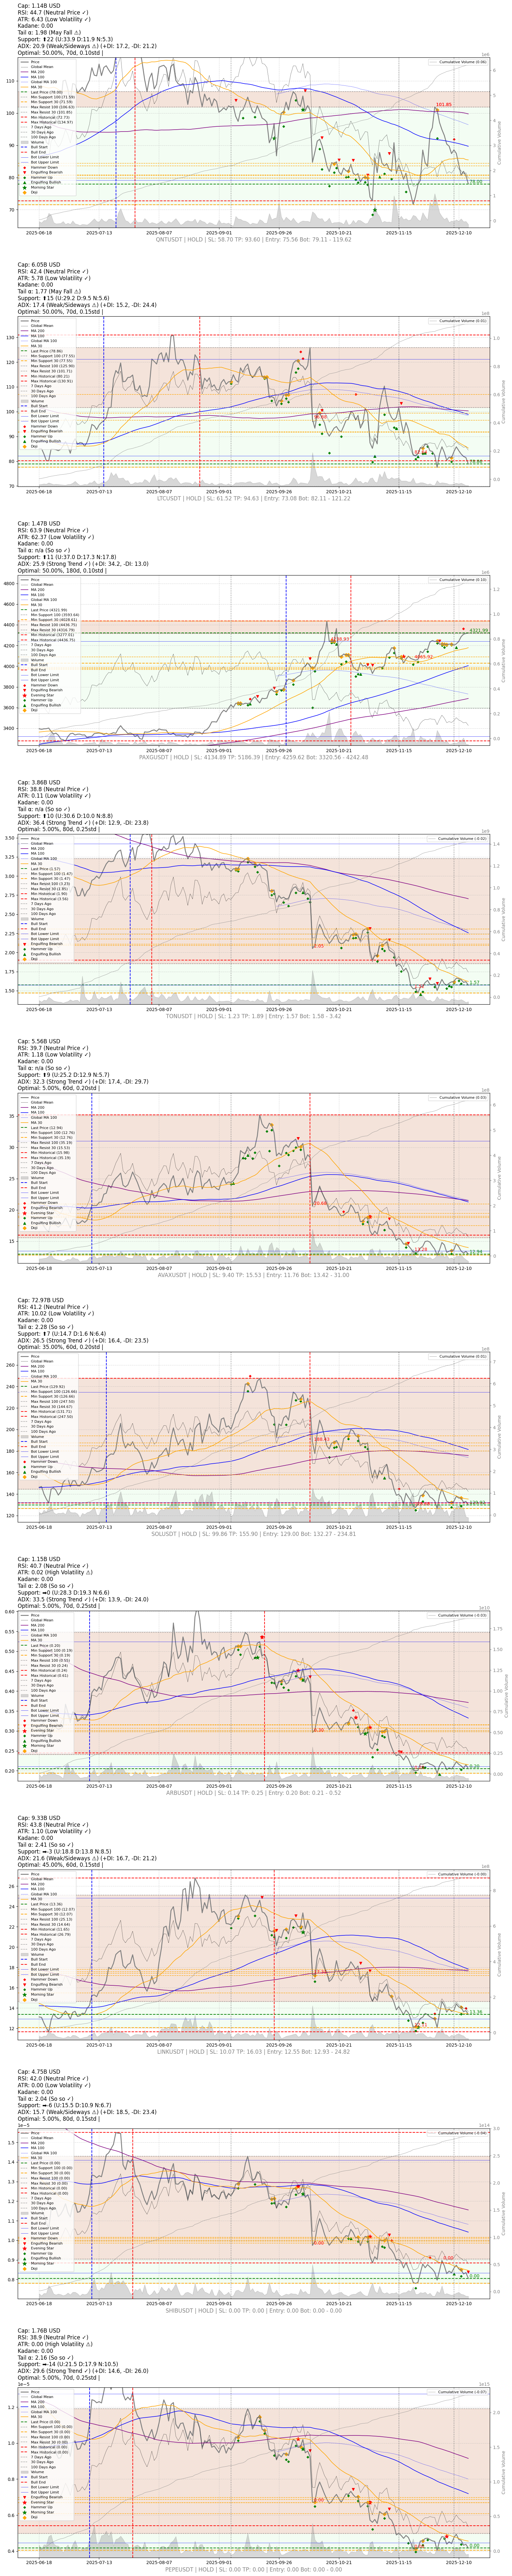

In [20]:
anal.graph()